d:\miniconda\envs\torch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\miniconda\envs\torch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\miniconda\envs\torch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\miniconda\envs\torch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32032 (\N{CJK UNIFIED IDEOGRAPH-7D20}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\miniconda\envs\torch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, *

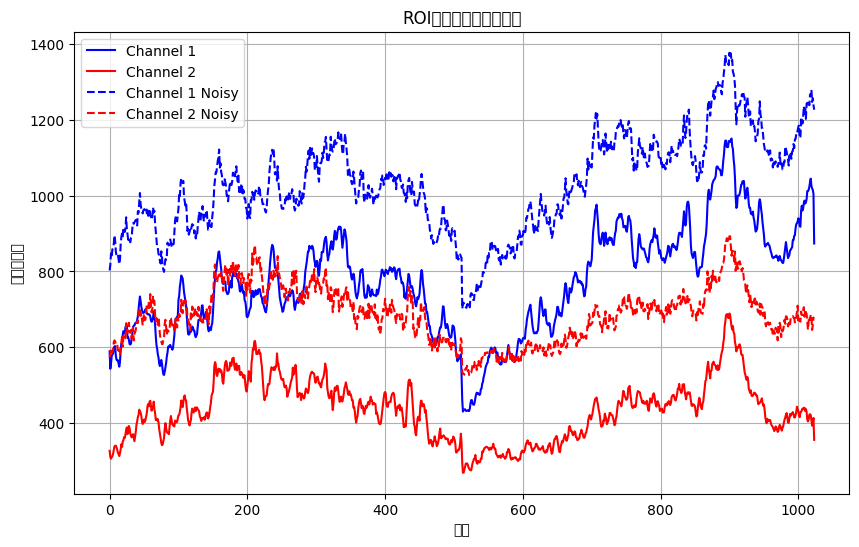

In [3]:
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt

# 读取双通道tif文件
img_clean = io.imread(r'E:\学习资料\paper\光场矫正\Figures\Composite_clean.tif')  # 替换为你的文件路径
img_noisy = io.imread(r'E:\学习资料\paper\光场矫正\Figures\Composite_noisy.tif')  # 替换为你的文件路径

# 假设图像形状为 (2, height, width) 或 (height, width, 2)
# 如果需要，重塑数组确保通道在第一维
if img_clean.shape[-1] == 2:
    img_clean = np.transpose(img_clean, (2, 0, 1))
if img_noisy.shape[-1] == 2:
    img_noisy = np.transpose(img_noisy, (2, 0, 1))

# 选择感兴趣区域 (ROI)
# 这里以示例坐标为例，请根据实际需要修改
y1, y2 = 512 * 3, 512 * 5  # 垂直范围
x1, x2 = 512 * 5, 512 * 7  # 水平范围

# 提取ROI区域
roi_ch1 = img_clean[0, y1:y2, x1:x2]
roi_ch2 = img_clean[1, y1:y2, x1:x2]

roi_ch1_noisy = img_noisy[0, y1:y2, x1:x2]
roi_ch2_noisy = img_noisy[1, y1:y2, x1:x2]

# 计算每行的平均值
avg_ch1 = np.mean(roi_ch1, axis=1)
avg_ch2 = np.mean(roi_ch2, axis=1)

avg_ch1_noisy = np.mean(roi_ch1_noisy, axis=1)
avg_ch2_noisy = np.mean(roi_ch2_noisy, axis=1)

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(avg_ch1, label='Channel 1', color='blue')
plt.plot(avg_ch2, label='Channel 2', color='red')
plt.plot(avg_ch1_noisy, label='Channel 1 Noisy', color='blue', linestyle='--')
plt.plot(avg_ch2_noisy, label='Channel 2 Noisy', color='red', linestyle='--')
plt.xlabel('行号')
plt.ylabel('平均像素值')
plt.title('ROI区域每行平均像素值')
plt.legend()
plt.grid(True)
plt.show()

清晰图像两通道的互信息: 0.4162
噪声图像两通道的互信息: 0.2336


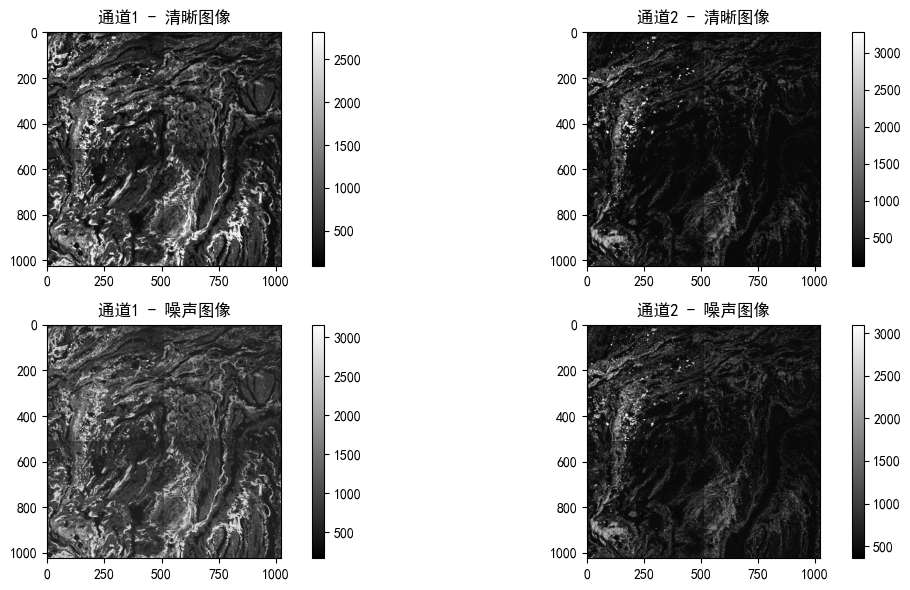

In [6]:
# 计算两个通道间的互信息
def calculate_mutual_information(ch1, ch2, bins=256):
    # 计算联合直方图
    hist_2d, x_edges, y_edges = np.histogram2d(
        ch1.ravel(),
        ch2.ravel(),
        bins=bins
    )
    
    # 计算联合概率分布
    pxy = hist_2d / float(np.sum(hist_2d))
    
    # 计算边缘概率分布
    px = np.sum(pxy, axis=1) # x的边缘概率分布
    py = np.sum(pxy, axis=0) # y的边缘概率分布
    
    # 计算互信息
    px_py = px[:, None] * py[None, :] # 边缘概率的乘积
    nzs = pxy > 0 # 找出非零元素
    
    # 计算互信息值
    mutual_information = np.sum(
        pxy[nzs] * np.log2(pxy[nzs] / px_py[nzs])
    )
    
    return mutual_information

# 计算清晰图像两通道的互信息
mi_clean = calculate_mutual_information(roi_ch1, roi_ch2)
print(f'清晰图像两通道的互信息: {mi_clean:.4f}')

# 计算噪声图像两通道的互信息  
mi_noisy = calculate_mutual_information(roi_ch1_noisy, roi_ch2_noisy)
print(f'噪声图像两通道的互信息: {mi_noisy:.4f}')

# 可视化ROI区域的不同通道
plt.figure(figsize=(12, 6))

plt.rcParams['font.family'] = 'SimHei'
# 创建2x2的子图布局
plt.subplot(221)
plt.imshow(roi_ch1, cmap='gray')
plt.title('通道1 - 清晰图像')
plt.colorbar()

plt.subplot(222)
plt.imshow(roi_ch2, cmap='gray') 
plt.title('通道2 - 清晰图像')
plt.colorbar()

plt.subplot(223)
plt.imshow(roi_ch1_noisy, cmap='gray')
plt.title('通道1 - 噪声图像')
plt.colorbar()

plt.subplot(224)
plt.imshow(roi_ch2_noisy, cmap='gray')
plt.title('通道2 - 噪声图像')
plt.colorbar()

plt.tight_layout()
plt.show()
